# Mean Force Integration

The aim of this notebook is to provide examples, as how to run metadynamics simulations, analyse them with MFI and use other useful features.
The layout of this notebook is as follows:

A: Simulations on Alanine Dipeptide

    (1) - Analysing a metadynamics simulations with MFI
    (2) - Running a new simulation and patching (1) and (2) together
    (3) - Running a new simulation with a harmonic potential and patching (1) and (3) together 

B: Simulations on Bjola Potential

    (1) - Running a metadynamics simulation and analyse with MFI
    (2) - Running 10 short simulations (each 1/10 the length of (1), and patch togehter with MFI)
    ###(3) - Running a new simulation with a harmonic potential and patching (1) and (3) together ### Maybe repetitive###

C: Simulations on Invernizzi Potential

    (1) - Running a metadynamics simulation and analyse with MFI
    (2) - Running multiple short simulations, patch togehter with MFI, and determine bootstrap error


In [1]:
import os
path = os.getcwd()
print("The path to this notebook is:", path)

import numpy as np
os.chdir("/home/ucecabj/Desktop/pyMFI_git")
from pyMFI import MFI
from pyMFI import run_plumed
import pickle
import matplotlib.pyplot as plt


The path to this notebook is: /home/ucecabj/Desktop/pyMFI_git/Notebooks


## A: Alanine Dipeptide | 2D periodic CV space example.

#### (1) - Analysing an existing metadynamics simulations with MFI.

A metadynaics simulation was already conducted. The resulting trajectory as CV's coordinates are saved in the file "positon0" and the corresponding HILLS file is saved as "HILLS0".

I will integrate the FES every  100  steps. This may take a while.
Total no. of Gaussians analysed: 3000
|1000/3000|==> Average Mean Force Error: 27.040229464669363    ||    Error in window 50.95175922070179
|2000/3000|==> Average Mean Force Error: 25.18579332554219    ||    Error in window 29.798179889707143
|3000/3000|==> Average Mean Force Error: 24.306521675797068    ||    Error in window 25.21759523051249


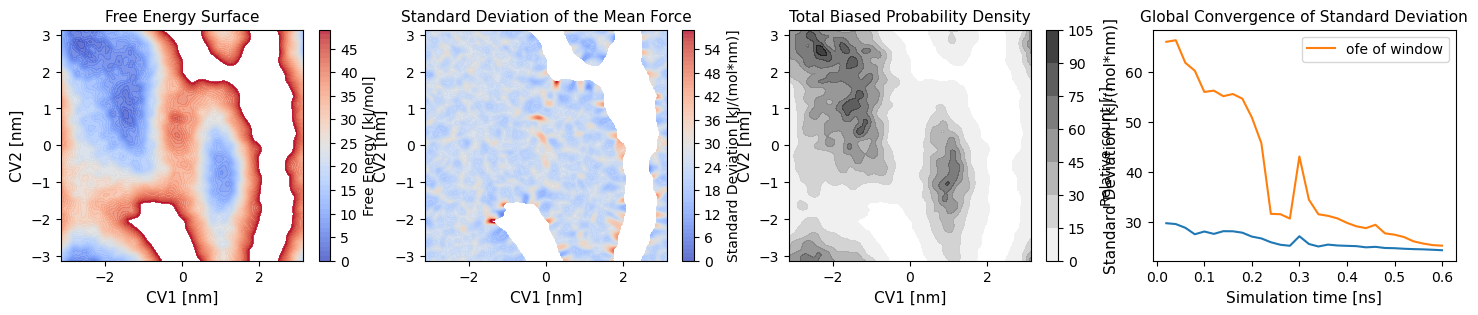

In [6]:
os.chdir("/home/ucecabj/Desktop/pyMFI_git/DATA_examples/AlanineDipeptide_pyMFI")

# #simulations steps for new simulation.
# simulation_steps = 300000

# #prepare new input files
# run_plumed.find_alanine_dipeptide_input(initial_position_x=0.0, initial_position_y=0.0, file_extension="_1sim")

# #Run Alanine dipeptide simulation
# run_plumed.run_alanine_dipeptide(simulation_steps, temperature=2.49, gaus_width_x=0.1, gaus_width_y=0.1, gaus_height=3, biasfactor=20, gaus_pace=100, file_extension="_1sim")

# #Read the HILLS file
HILLS=MFI.load_HILLS_2D(hills_name="HILLS_1sim")

# #Read the Colvar File
[position_x, position_y] = MFI.load_position_2D(position_name="position_1sim")

# #Compute the time-independent mean force
results = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.1, kT = 2.49, log_pace = 1000, error_pace = 100, WellTempered=1, nhills=-1, periodic=1, window_corners=[-0.5, 0.5, -1.5, 1.5], FES_cutoff=50)
[X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, ofe_history_window, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = results

# #integration with the FFT method
[X, Y, FES] = MFI.FFT_intg_2D(Ftot_x, Ftot_y)

# Plot Recap
MFI.plot_recap_2D(X, Y, MFI.zero_to_nan(FES*cutoff), MFI.zero_to_nan(Ftot_den*cutoff), MFI.zero_to_nan(ofe*cutoff), ofe_history, time_history, FES_lim=50, ofe_map_lim=60)

plt.plot([time/1000 for time in time_history], ofe_history_window, label="ofe of window")
plt.legend()
plt.show()


In [8]:
# #Load Force terms
# [X, Y, FES, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, ofv_history, ofe_history, ofe_history_window, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = MFI.load_pkl(results_path + "/alanine_dipeptide_300K.pkl")

#rename old results
Froce_terms_old = [Ftot_den, Ftot_den2, Ftot_x, Ftot_y, ofv_num_x, ofv_num_y]
ofe_history_old = ofe_history
ofe_history_window_old = ofe_history_window
ofe_history_time_old = time_history

# Save Force terms
# results_1sim = [X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, ofe_history_window, time_history, Ftot_den2, ofv_num_x, ofv_num_y]
# MFI.save_pkl(results_1sim, results_path + "/alanine_dipeptide_300K.pkl")

#### (2) - Running a new simulation and patching (1) and (2) together

Requires that simulation (1) has already been analysed and the force terms and error progression to be saved in the Froce_terms_old and ofe_history_old list.

I will integrate the FES every  100  steps. This may take a while.
Total no. of Gaussians analysed: 3000
|1000/3000|==> Average Mean Force Error: 24.66872555165546    ||    Error in window 25.589382573313355
|2000/3000|==> Average Mean Force Error: 25.186893782271433    ||    Error in window 25.775612977613168
|3000/3000|==> Average Mean Force Error: 25.286602544314743    ||    Error in window 25.69025015004786


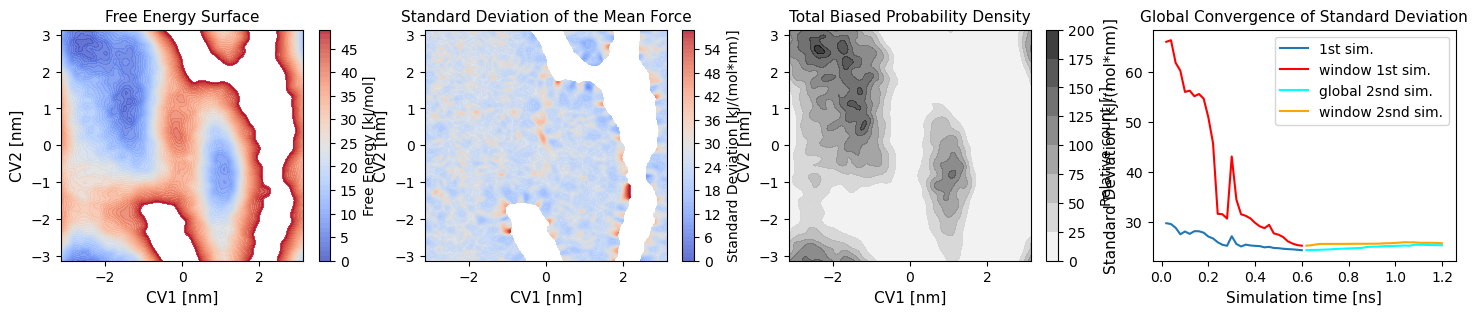

In [9]:
# #simulations steps for new simulation. Same as before.
simulation_steps = 300000

# #prepare new input files
# run_plumed.find_alanine_dipeptide_input(initial_position_x=1.0, initial_position_y=-1.0, file_extension="_2sim")

# #Run Alanine dipeptide simulation
# run_plumed.run_alanine_dipeptide(simulation_steps, temperature=2.49, gaus_width_x=0.1, gaus_width_y=0.1, gaus_height=3, biasfactor=20, gaus_pace=100, file_extension="_2sim")

#Read the HILLS file
HILLS=MFI.load_HILLS_2D(hills_name="HILLS_2sim")

#Read the Colvar File
[position_x, position_y] = MFI.load_position_2D(position_name="position_2sim")

# Compute the time-independent mean force
results = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.1, kT = 2.49, periodic=1, log_pace = 1000, error_pace = 100, WellTempered=1, nhills=-1, window_corners=[-0.5, 0.5, -1.5, 1.5], FES_cutoff=50, base_terms = Froce_terms_old)
[X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, ofe_history_window, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = results


#Patch results
patch = MFI.patch_2D([Froce_terms_old, [Ftot_den, Ftot_den2, Ftot_x, Ftot_y, ofv_num_x, ofv_num_y]])
time_history = [element+ofe_history_time_old[-1] for element in time_history]


#integration with the FFT method
[X, Y, FES] = MFI.FFT_intg_2D(patch[2], patch[3])

# Plot Recap
MFI.plot_recap_2D(X, Y, FES, patch[0], ofe, ofe_history_old, ofe_history_time_old, FES_lim=50, ofe_map_lim=60)
plt.plot(0, np.nan, c="C0", label="1st sim.")
plt.plot([time/1000 for time in ofe_history_time_old], ofe_history_window_old, c="red", label="window 1st sim.")
plt.plot([time/1000 for time in time_history], ofe_history, c="cyan", label="global 2snd sim.")
plt.plot([time/1000 for time in time_history], ofe_history_window, c="orange", label="window 2snd sim.")
plt.legend()
plt.show()

# # Save Force terms
# Ftot_master = [X, Y, Ftot_den, FES, patch[0], ofe, ofe_history_old[0], ofe_history_old[1], time_history, ofe_history]
# with open(results_path + "/alanine_dipeptide_patch2.pkl","wb") as fw:
#     pickle.dump(Ftot_master, fw)

#### (3) - Running a new simulation with a harmonic potential and patching (1) and (3) together

Requires that simulation (1) has already been analysed and the force terms and error progression to be saved in the Froce_terms_old and ofe_history_old list.



I will integrate the FES every  100  steps. This may take a while.
Total no. of Gaussians analysed: 1500
|500/1500|==> Average Mean Force Error: 24.030579664910913    ||    Error in window 22.594655480624795
|1000/1500|==> Average Mean Force Error: 24.034871414780344    ||    Error in window 22.50767103990442
|1500/1500|==> Average Mean Force Error: 24.074415306374775    ||    Error in window 22.59958110600033


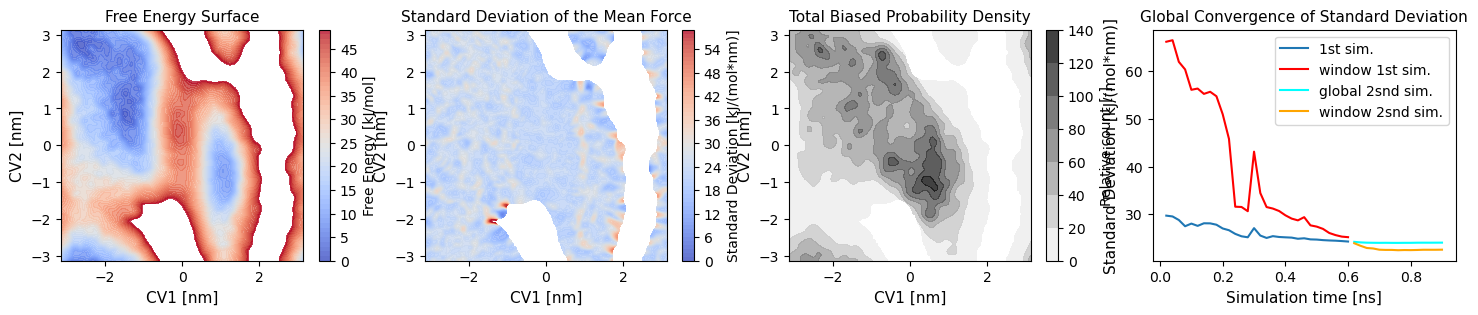

In [11]:
path_data = "/home/ucecabj/Desktop/pyMFI_git/DATA_examples/AlanineDipeptide_pyMFI"
os.chdir(path_data)

simulation_steps = 150000
kappa_x = 100

# #prepare new input files
# run_plumed.find_alanine_dipeptide_input(initial_position_x=0.5, initial_position_y=1.0, file_extension="_static")

# # #Run A19:55lanine dipeptide simulation
# run_plumed.run_alanine_dipeptide(simulation_steps, temperature=2.49, gaus_width_x=0.1, gaus_width_y=0.1, gaus_height=1, biasfactor=20, gaus_pace=100, hp_centre_x=0.0, hp_centre_y=0.0, hp_kappa_x=kappa_x, hp_kappa_y=0, file_extension="_static")

#Read the HILLS file
HILLS=MFI.load_HILLS_2D(hills_name=path_data + "/HILLS" + "_static")

#Read the Colvar File
[position_x, position_y] = MFI.load_position_2D(position_name=path_data + "/position" + "_static")

# Compute the time-independent mean force
results = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.1, kT = 2.49, periodic=1, log_pace = 500, error_pace = 100, WellTempered=1, nhills=-1, window_corners=[-0.5, 0.5, -1.5, 1.5], FES_cutoff=50, base_terms = Froce_terms_old, hp_centre_x=0.0, hp_centre_y=0.0, hp_kappa_x=kappa_x, hp_kappa_y=0)
[X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, ofv_history, ofe_history, ofe_history_window, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = results


#Patch results
[Ftot_den, Ftot_den2, Ftot_x, Ftot_y, ofv_num_x, ofv_num_y] = MFI.patch_2D([Froce_terms_old, [Ftot_den, Ftot_den2, Ftot_x, Ftot_y, ofv_num_x, ofv_num_y]])
time_history = [element+ofe_history_time_old[-1] for element in time_history]
history_time = [element+ofe_history_time_old[-1] for element in time_history]


#integration with the FFT method
[X, Y, FES] = MFI.FFT_intg_2D(Ftot_x, Ftot_y)

# Plot Recap
MFI.plot_recap_2D(X, Y, MFI.zero_to_nan(FES*cutoff), MFI.zero_to_nan(Ftot_den*cutoff), MFI.zero_to_nan(ofe*cutoff), ofe_history_old, ofe_history_time_old, FES_lim=50, ofe_map_lim=60)
plt.plot(0, np.nan, c="C0", label="1st sim.")
plt.plot([time/1000 for time in ofe_history_time_old], ofe_history_window_old, c="red", label="window 1st sim.")
plt.plot([time/1000 for time in time_history], ofe_history, c="cyan", label="global 2snd sim.")
plt.plot([time/1000 for time in time_history], ofe_history_window, c="orange", label="window 2snd sim.")
plt.legend()
plt.show()


## B: Bjola potential | 2D non-periodic example

Analytical function: $z(x,y) = 7*x^4-23*x^2+7*y^4-23*y^2$

#### (1) - Running a metadynamics simulation and analyse with MFI

Total no. of Gaussians analysed: 10000
|1000/10000|==> Average Mean Force Error: 15.173747718168944    ||    Error in window 40.12327286919525
|2000/10000|==> Average Mean Force Error: 14.924637861403196    ||    Error in window 22.211861486866216
|3000/10000|==> Average Mean Force Error: 15.17083887739076    ||    Error in window 17.69928361293544
|4000/10000|==> Average Mean Force Error: 15.429125160257298    ||    Error in window 14.689830402720522
|5000/10000|==> Average Mean Force Error: 15.790517721441505    ||    Error in window 14.951135470954277
|6000/10000|==> Average Mean Force Error: 16.080545061292256    ||    Error in window 14.918991081976175
|7000/10000|==> Average Mean Force Error: 16.34181041644821    ||    Error in window 14.906587478228163
|8000/10000|==> Average Mean Force Error: 16.441270992520867    ||    Error in window 14.900618638267202
|9000/10000|==> Average Mean Force Error: 16.43323716427024    ||    Error in window 14.810564581225874
|10000/10000|==> Aver

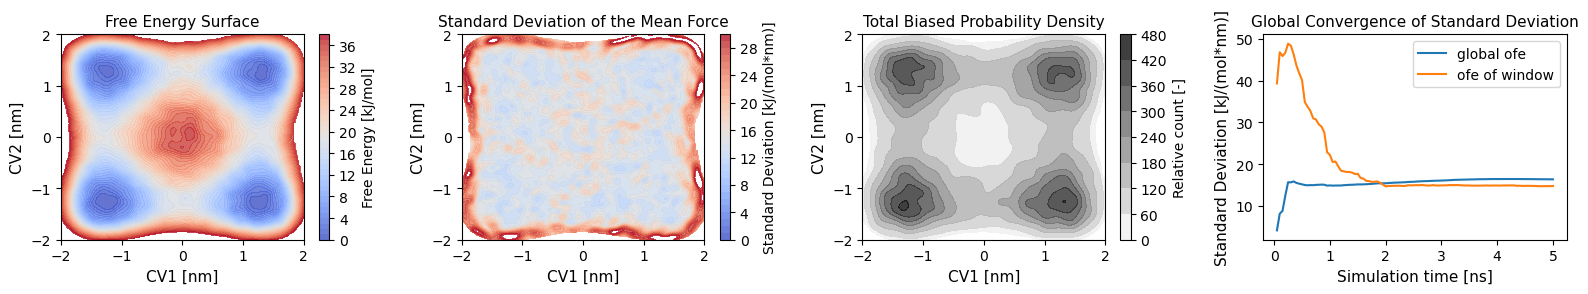

In [2]:
path_bjola = "/home/ucecabj/Desktop/pyMFI_git/DATA_examples/Antoniu_2D_potential"
os.chdir(path_bjola)

# #Run simulation
# run_plumed.run_langevin2D(1000000, gaus_width_x=0.1, gaus_width_y=0.1, gaus_height=2, biasfactor=20, gaus_pace=100, file_extension="_1M")

#Read the HILLS file
HILLS=MFI.load_HILLS_2D(hills_name="HILLS_1M")

#Read the Colvar File
[position_x, position_y] = MFI.load_position_2D(position_name="position_1M")

#Compute the time-independent mean force
[X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, ofe_history_window, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.1, kT = 1, min_grid=np.array((-2, -2)), max_grid=np.array((2, 2)), nbins=np.array((200, 200)), log_pace = 1000, error_pace = 100, nhills=-1, periodic=0, window_corners=[-0.5, 0.5, -0.5, 0.5], FES_cutoff=38, FFT_integration=1)

#integration on a periodic domain
[X, Y, FES] = MFI.intgrad2(Ftot_x, Ftot_y, min_grid=np.array((-2, -2)), max_grid=np.array((2, 2)))

# Plot Recap
MFI.plot_recap_2D(X, Y, MFI.zero_to_nan(FES*cutoff), MFI.zero_to_nan(Ftot_den*cutoff), MFI.zero_to_nan(ofe*cutoff), ofe_history, time_history, FES_lim=39, ofe_map_lim=31)
plt.plot([time/1000 for time in time_history], ofe_history_window, label="ofe of window")
plt.legend()
plt.show()

In [3]:
#rename old results
Froce_terms_old = [Ftot_den, Ftot_den2, Ftot_x, Ftot_y, ofv_num_x, ofv_num_y]
ofe_history_old = ofe_history
ofe_history_window_old = ofe_history_window
ofe_history_time_old = time_history

# # Save Force terms
# results_bjola_pot = [X, Y, FES, cutoff, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, ofv_history, ofe_history, ofe_history_window, time_history, Ftot_den2, ofv_num_x, ofv_num_y]
# MFI.save_pkl(results_bjola_pot, results_path + "/bjola_pot_1M.pkl")

#### (2) - Running 10 short simulations (each 1/10 the length of (1), and patch togehter with MFI)

Simulation: 0  |   Total no. of Gaussians analysed: 1000


/home/ucecabj/Desktop/pyMFI_git/pyMFI/MFI.py:455: RuntimeWarning: invalid value encountered in double_scalars
  ofe_history_window.append(np.sum(ofe_cut_window) / (np.count_nonzero(ofe_cut_window)))


|1000/1000|==> Average Mean Force Error: 84.12277475623381    ||    Error in window nan
Simulation: 1  |   Total no. of Gaussians analysed: 1000
|1000/1000|==> Average Mean Force Error: 78.83537812999282    ||    Error in window nan
Simulation: 2  |   Total no. of Gaussians analysed: 1000
|1000/1000|==> Average Mean Force Error: 76.34208034997498    ||    Error in window 238.63407003980882
Simulation: 3  |   Total no. of Gaussians analysed: 1000
|1000/1000|==> Average Mean Force Error: 75.15640784789313    ||    Error in window 175.30292185393077
Simulation: 4  |   Total no. of Gaussians analysed: 1000
|1000/1000|==> Average Mean Force Error: 74.23909259483376    ||    Error in window 207.90076954375596
Simulation: 5  |   Total no. of Gaussians analysed: 1000
|1000/1000|==> Average Mean Force Error: 74.25924209694034    ||    Error in window 207.90282284284652
Simulation: 6  |   Total no. of Gaussians analysed: 1000
|1000/1000|==> Average Mean Force Error: 73.62161163640658    ||    Er

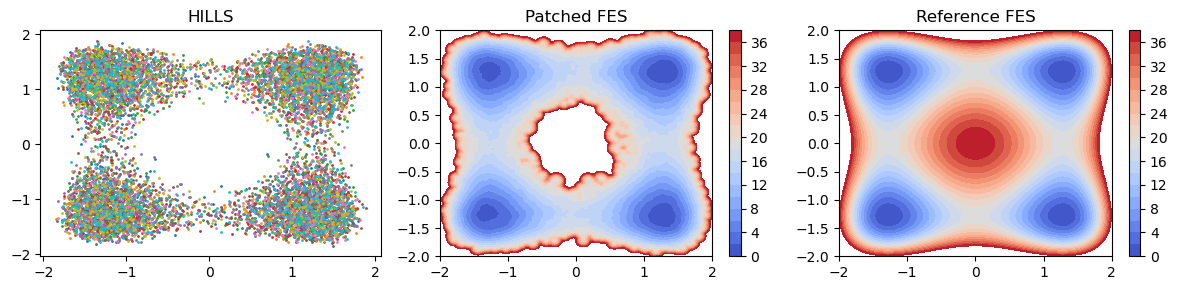

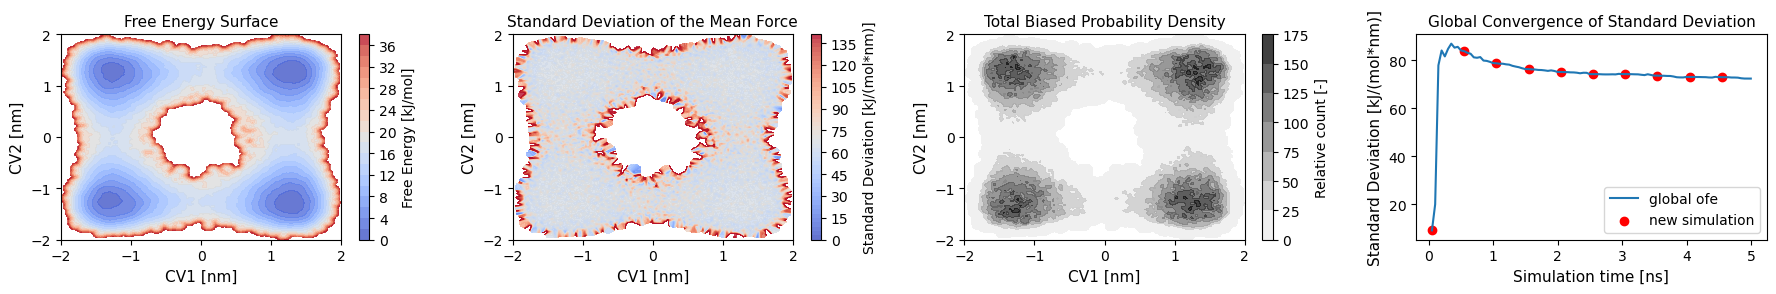

In [3]:
path_bjola = "/home/ucecabj/Desktop/pyMFI_git/DATA_examples/Antoniu_2D_potential"
os.chdir(path_bjola)


simulation_steps = 100000
n_simulations = 10
master = []
master_patch = [[np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200))]]
ofe_history_patch = [0]
ofe_history_patch_time = [0]
pbt_bandwidth = 0.02


for simulation in np.arange(0,n_simulations): 

    print('Simulation: '+str(simulation), end="  |   ")
    file_extension="_s" + str(int(simulation))
    
    # ipos=1.3*(2 * np.random.rand(2) - 1)
    # #RUN short sim from random location
    # run_plumed.run_langevin2D(simulation_steps, initial_position_x=ipos[0], initial_position_y=ipos[1], gaus_width_x=0.1, gaus_width_y=0.1, gaus_height=2, biasfactor=20, gaus_pace=100, file_extension=file_extension)

    #Read the HILLS and position file file
    HILLS=MFI.load_HILLS_2D(hills_name="HILLS" + file_extension)
    [position_x, position_y] = MFI.load_position_2D(position_name="position" + file_extension)
    plt.figure(1, figsize=(12,3))
    plt.subplot(1,3,1)
    plt.scatter(HILLS[:,1],HILLS[:,2], s=1)
    plt.title("HILLS")

    #COMPUTE Mean force and weight of the simulation
    [X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, valume_history, ofe_history, ofe_history_window, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = pbt_bandwidth, kT = 1, min_grid=np.array((-2, -2)), max_grid=np.array((2, 2)), nbins=np.array((200, 200)), log_pace = 1000, error_pace = 100, periodic=0, base_terms = master_patch[-1], window_corners=[-0.5, 0.5, -0.5, 0.5], FES_cutoff=38, FFT_integration = 1)
    
    #store results in master_array
    master.append([Ftot_den, Ftot_den2, Ftot_x, Ftot_y, ofv_num_x, ofv_num_y])
    #patch master and store result in master_patch
    master_patch.append(MFI.patch_2D(master))
    #save ofe history
    ofe_history_patch += ofe_history
    ofe_history_time_adj = [element+ofe_history_patch_time[-1] for element in time_history]
    ofe_history_patch_time += ofe_history_time_adj
    
#find "standard devaition of mean fplt.subplot(1,3,2)orce" map
[ofv, ofe] = MFI.mean_force_variance(master_patch[-1][0], master_patch[-1][1], master_patch[-1][2], master_patch[-1][3], master_patch[-1][4], master_patch[-1][5])

#integration on a periodic domain
[X, Y, FES] = MFI.FFT_intg_2D(master_patch[-1][2], master_patch[-1][3], min_grid=np.array((-2, -2)), max_grid=np.array((2, 2)), nbins=np.array((200, 200)))

# cutoff = np.where(Ftot_den < 10**-5, 0, cutoff)

# Plot Results
#shorten history to remove the first entry
ofe_history_patch = ofe_history_patch[1:]
ofe_history_patch_time = ofe_history_patch_time[1:]
#make "sim_start" list with only the first entry of a simulation
sim_start = [ofe_history_patch_time[i*10] for i in range(n_simulations)]
sim_start_error = [ofe_history_patch[i*10] for i in range(n_simulations)]

#Plot HILLS, FES and ref. FES
plt.figure(1, figsize=(12,3))
plt.subplot(1,3,2)
plt.contourf(X,Y,FES, cmap='coolwarm', levels=range(0,40,2))
plt.title("Patched FES")
plt.colorbar()

Z = - 23*X**2 + 7*X**4 - 23*Y**2 + 7*Y**4
Z = Z - np.min(Z)

plt.subplot(1,3,3)
plt.contourf(X,Y,Z, cmap='coolwarm', levels=range(0,40,2))
plt.colorbar()
plt.title("Reference FES")
plt.tight_layout()
plt.show()

# Plot Recap
MFI.plot_recap_2D(X, Y, MFI.zero_to_nan(FES*cutoff), MFI.zero_to_nan(master_patch[-1][0]*cutoff), MFI.zero_to_nan(ofe*cutoff), ofe_history_patch, ofe_history_patch_time, FES_lim=40, ofe_map_lim=int(ofe_history_patch[-1]*2), FES_step=2, ofe_step=3)
plt.scatter([time/1000 for time in sim_start], sim_start_error, c="r", label="new simulation")
plt.legend()
plt.show()



In [4]:
# # Save Force terms
# results_bjola_pot_multisim = [X, Y, FES, master_patch[-1][0], ofe, ofe_history_patch, ofe_history_patch_time, sim_start, sim_start_error]
# MFI.save_pkl(results_bjola_pot_multisim, results_path + "/bjola_pot_multisim.pkl")

# [X, Y, FES, Ftot_den, ofe, ofe_history_patch, ofe_history_patch_time, sim_start, sim_start_error] = MFI.load_pkl(results_path + "/bjola_pot_multisim.pkl")


#### (3) - Running a new simulation with a harmonic potential and patching (1) and (3) together

In [ ]:
# Load results from Simulation 1
# [X, Y, FES, cutoff, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, ofv_history, ofe_history, ofe_history_window, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = MFI.load_pkl(results_path + "/bjola_pot_1M.pkl")
# Froce_terms_old = [Ftot_den, Ftot_den2, Ftot_x, Ftot_y, ofv_num_x, ofv_num_y]
# ofe_history_old = ofe_history
# ofe_history_window_old = ofe_history_window
# ofe_history_time_old = time_history

Total no. of Gaussians analysed: 3000
|1000/3000|==> Average Mean Force Error: 16.30291447291556    ||    Error in window 13.7185988463108
|2000/3000|==> Average Mean Force Error: 16.219436013887634    ||    Error in window 12.998648145917015
|3000/3000|==> Average Mean Force Error: 16.17901075505645    ||    Error in window 12.635340316636336


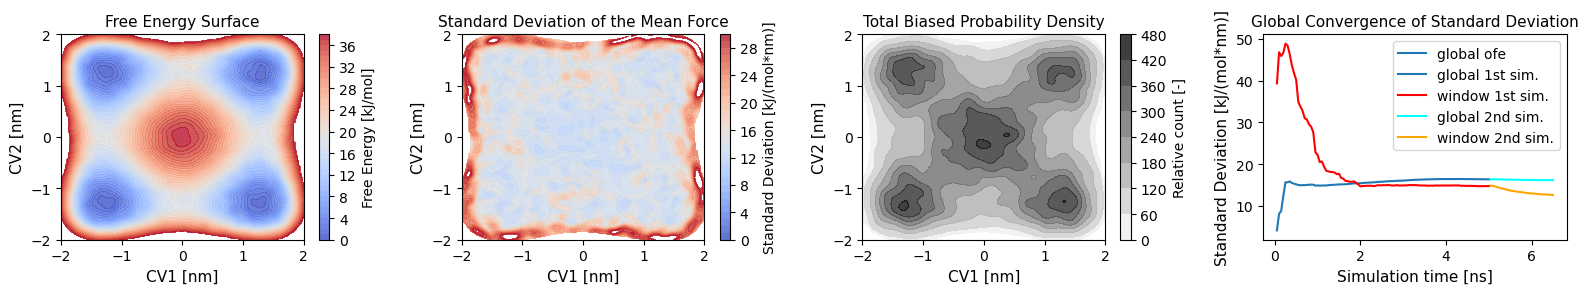

In [5]:
# #Run simulation with Harmonic potential
# run_plumed.run_langevin2D(300000, grid_min_x=-3.0, grid_max_x=3.0, grid_min_y=-3.0, grid_max_y=3.0, grid_bin_x=200, grid_bin_y=200, gaus_width_x=0.1, gaus_width_y=0.1, gaus_height=1, biasfactor=5, gaus_pace=100, hp_centre_x=0.0, hp_centre_y=0.0, hp_kappa_x=50, hp_kappa_y=50, file_extension="BjHP")


#Read the HILLS file
HILLS=MFI.load_HILLS_2D(hills_name="HILLS" + "BjHP")

#Read the Colvar File
[position_x, position_y] = MFI.load_position_2D(position_name="position" + "BjHP")

#Compute the time-independent mean force
[X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, ofe_history_window, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, min_grid=np.array((-2, -2)), max_grid=np.array((2, 2)), nbins=np.array((200, 200)), bw = 0.1, kT = 1, log_pace = 1000, error_pace = 100, base_terms = Froce_terms_old, window_corners=[-0.5, 0.5, -0.5, 0.5], hp_centre_x=0.0, hp_centre_y=0.0, hp_kappa_x=50, hp_kappa_y=50, FES_cutoff=38, FFT_integration=1)


#Patch results
[Ftot_den, Ftot_den2, Ftot_x, Ftot_y, ofv_num_x, ofv_num_y] = MFI.patch_2D([Froce_terms_old, [Ftot_den, Ftot_den2, Ftot_x, Ftot_y, ofv_num_x, ofv_num_y]])
ofe_history_time = [element+ofe_history_time_old[-1] for element in time_history]


#integration on a periodic domain
[X, Y, FES] = MFI.FFT_intg_2D(Ftot_x, Ftot_y, min_grid=np.array((-2, -2)), max_grid=np.array((2, 2)), nbins=np.array((200, 200)))


# Plot Recap
MFI.plot_recap_2D(X, Y, MFI.zero_to_nan(FES*cutoff), MFI.zero_to_nan(Ftot_den*cutoff), MFI.zero_to_nan(ofe*cutoff), ofe_history_old, ofe_history_time_old, FES_lim=39, ofe_map_lim=31)
plt.plot(0, np.nan, c="C0", label="global 1st sim.")
plt.plot([time/1000 for time in ofe_history_time_old], ofe_history_window_old, c="red", label="window 1st sim.")
plt.plot([time/1000 for time in ofe_history_time], ofe_history, c="cyan", label="global 2nd sim.")
plt.plot([time/1000 for time in ofe_history_time], ofe_history_window, c="orange", label="window 2nd sim.")
plt.legend()
plt.show()

In [16]:
# # Save Force terms
# results_bjola_pot = [X, Y, FES, cutoff, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, ofe_history_old, ofe_history_window_old, ofe_history_time_old, ofe_history, ofe_history_window, ofe_history_time, Ftot_den2, ofv_num_x, ofv_num_y]
# MFI.save_pkl(results_bjola_pot, results_path + "/bjola_pot_static_patch_window.pkl")

## C: Invernizzi Potential | 2D non-periodic example

$z = 1.34549*x^4+1.90211*x^3*y+3.92705*x^2*y^2-6.44246*x^2-1.90211*x*y^3+5.58721*x*y+1.33481*x+1.34549*y^4-5.55754*y^2+0.904586*y+18.5598$

#### (0) - Analytical plot

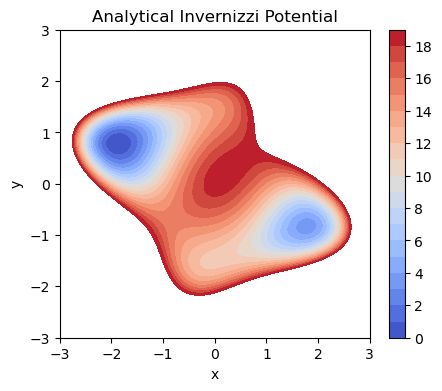

In [3]:
import os
os.chdir("/home/ucecabj/Desktop/pyMFI_git")
import numpy as np
from pyMFI import MFI
from pyMFI import run_plumed
import pickle
import matplotlib.pyplot as plt

# results_path = "/home/antoniu/Desktop/MFI_git/MFI_master/MFI/results_plot"

grid = np.linspace(-3, 3, 200); 
X, Y = np.meshgrid(grid, grid)
inve_pot = 1.34549*X**4+1.90211*X**3*Y+3.92705*X**2*Y**2-6.44246*X**2-1.90211*X*Y**3+5.58721*X*Y+1.33481*X+1.34549*Y**4-5.55754*Y**2+0.904586*Y+18.5598
inve_pot = inve_pot - np.min(inve_pot)

plt.figure(figsize=(5,4)); 
plt.contourf(X, Y, inve_pot, levels=range(0, 20, 1), cmap='coolwarm')
plt.xlabel("x"); plt.ylabel("y"); 
plt.title("Analytical Invernizzi Potential"); 
plt.colorbar()
plt.show()

#### (1) - Running a metadynamics simulation and analyse with MFI

I will integrate the FES every  100  steps. This may take a while.
Total no. of Gaussians analysed: 2000
|1000/2000|==> Average Mean Force Error: 9.901012098826062
|2000/2000|==> Average Mean Force Error: 9.673009013392457


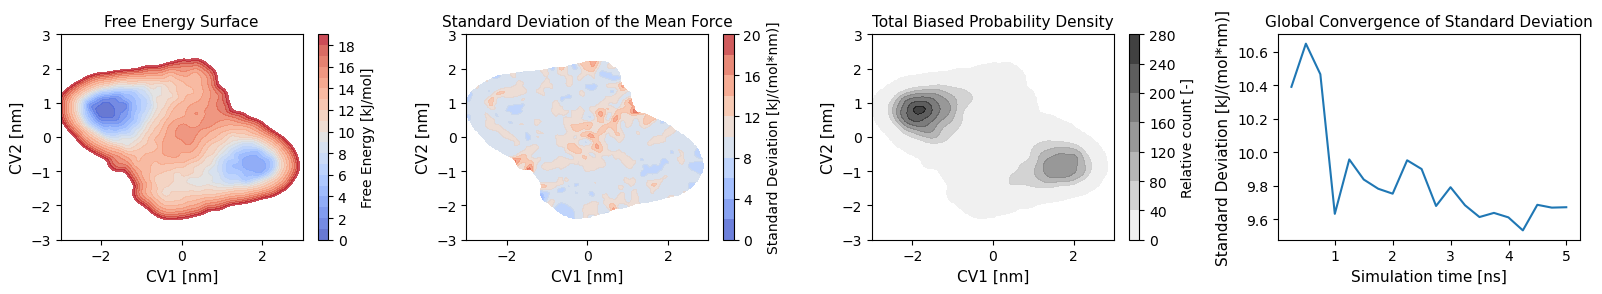

In [9]:
path_data = "/home/ucecabj/Desktop/pyMFI_git/DATA_examples/Invernizzi_2D_potential"
os.chdir(path_data)

#Run simulation
# run_plumed.run_2D_Invernizzi(simulation_steps=1000000, sigma=0.1, height=0.5, biasfactor=10, initial_position_x=-1, initial_position_y=-1, file_extension="long")

#Read the HILLS file
HILLS=MFI.load_HILLS_2D(hills_name="HILLSinve_long")

#Read the Colvar File
[position_x, position_y] = MFI.load_position_2D(position_name="positioninve_long")

#COMPUTE Mean force and weight of the simulation
[X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.12, kT = 1, min_grid=np.array((-3, -3)), max_grid=np.array((3, 3)), log_pace = 1000, error_pace = 100, FES_cutoff = 20)

#integration on a periodic domain
[X, Y, FES] = MFI.intgrad2(Ftot_x, Ftot_y, min_grid=np.array((-3, -3)), max_grid=np.array((3, 3)))

cutoff = np.where(FES <= np.ones_like(FES) * 18, 1, 0)

#Plot results
MFI.plot_recap_2D(X, Y, FES, MFI.zero_to_nan(np.where(Ftot_den > 0.1, Ftot_den, 0)), MFI.zero_to_nan(ofe*cutoff), ofe_history, time_history, FES_lim=20, ofe_map_lim=21, FES_step=1, ofe_step=2)
plt.show()

In [9]:
MFI.save_pkl([X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, ofv_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y], "/home/antoniu/Desktop/MFI_git/MFI_master/MFI/Invernizzi_2D_potential/results_1M.pkl")

# [X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, ofv_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = MFI.load_pkl("/home/antoniu/Desktop/MFI_git/MFI_master/MFI/Invernizzi_2D_potential/results_1M.pkl")

#### (2) - Running multiple short simulations, patch togehter with MFI, and determine bootstrap error

Simulation:  0    |   I will integrate the FES every  100  steps. This may take a while.
Total no. of Gaussians analysed: 500
|500/500|==> Average Mean Force Error: 13.467449100415553
Simulation:  1    |   I will integrate the FES every  100  steps. This may take a while.
Total no. of Gaussians analysed: 500
|500/500|==> Average Mean Force Error: 13.252640573854274
Simulation:  2    |   I will integrate the FES every  100  steps. This may take a while.
Total no. of Gaussians analysed: 500
|500/500|==> Average Mean Force Error: 13.206530827635575
Simulation:  3    |   I will integrate the FES every  100  steps. This may take a while.
Total no. of Gaussians analysed: 500
|500/500|==> Average Mean Force Error: 12.945142237553668
Simulation:  4    |   I will integrate the FES every  100  steps. This may take a while.
Total no. of Gaussians analysed: 500
|500/500|==> Average Mean Force Error: 12.86567759934191
Simulation:  5    |   I will integrate the FES every  100  steps. This may take a

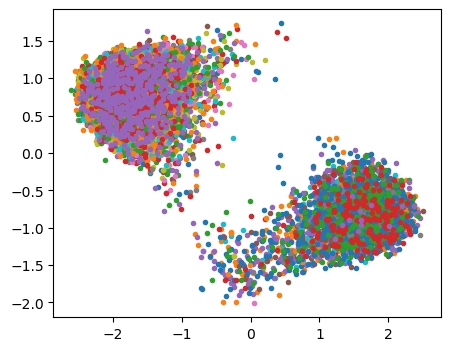

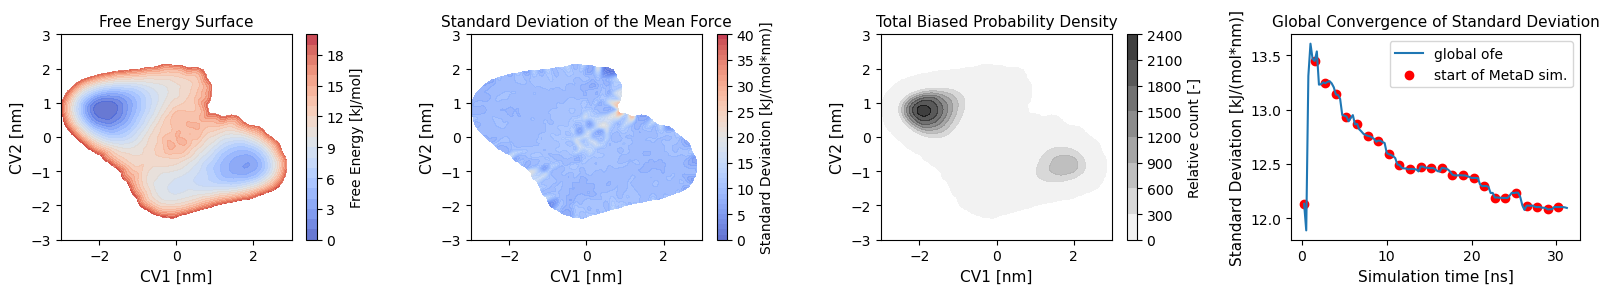



final AD: 4.5955


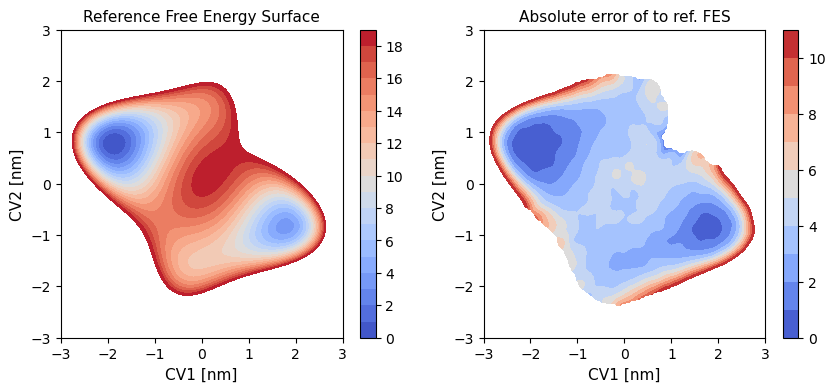

In [18]:
# path_data = "/home/ucecabj/Desktop/pyMFI_git/DATA_examples/Invernizzi_2D_potential"
path_data = "/home/ucecabj/Desktop/pyMFI_git/DATA_examples/Invernizzi_2D_potential_more_data"
os.chdir(path_data)

forces_all = []

master = []
master_patch = [[np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200))]]
ofe_history_patch = [0]
time_history_patch = [0]

n_simulations = 25

for simulation in np.arange(0,n_simulations):   
    print("Simulation: ", simulation, "   |   " , end="")          
    if os.path.exists(path_data + "/forces_inve_" + str(simulation)) == True:# and 1 ==2:
        #Read the HILLS file for traj plot
        HILLS=MFI.load_HILLS_2D(hills_name="HILLSinve_"+str(simulation))
        plt.plot(HILLS[:,1],HILLS[:,2],'.')
        [X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, ofv_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = MFI.load_pkl(path_data + "/forces_inve_" + str(simulation))
    else:
        # #Randomize initial position
        # [initial_position_x, initial_position_y] = 1.3*(2 * np.random.rand(2) - 1)
    
        # #Run simulation
        # run_plumed.run_2D_Invernizzi(simulation_steps=100000, sigma=0.1, height=0.8, biasfactor=10, initial_position_x=initial_position_x, initial_position_y=initial_position_y, file_extension=str(simulation))
                                             
        #Read the HILLS file
        HILLS=MFI.load_HILLS_2D(hills_name="HILLSinve_"+str(simulation))
        plt.plot(HILLS[:,1],HILLS[:,2],'.')
        
        #Read the Colvar File
        [position_x, position_y] = MFI.load_position_2D(position_name="positioninve_"+str(simulation))
        
        #COMPUTE Mean force and weight of the simulation
        [X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, 
                                bw = 0.1, kT = 1, log_pace = 500, error_pace = 100, base_terms = master_patch[-1], nhills=-1, 
                                min_grid=np.array((-3, -3)), max_grid=np.array((3, 3)), nbins=np.array((200, 200)), FES_cutoff = 20)
        #save results
        MFI.save_pkl([X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y], path_data + "/forces_inve_" + str(simulation))
        
         
    forces_all.append([X, Y, Ftot_den, Ftot_x, Ftot_y])
    
    #store results in master_array
    master.append([Ftot_den, Ftot_den2, Ftot_x, Ftot_y, ofv_num_x, ofv_num_y])
    #patch master and store result in master_patch
    master_patch.append(MFI.patch_2D(master))
    #save ofe history
    ofe_history_patch += ofe_history
    
    time_history_adj = [element+time_history_patch[-1] for element in time_history]
    time_history_patch += time_history_adj
    
    
#find "standard devaition of mean force" map
[ofv, ofe] = MFI.mean_force_variance(master_patch[-1][0], master_patch[-1][1], master_patch[-1][2], master_patch[-1][3], master_patch[-1][4], master_patch[-1][5])

#integration on a periodic domain
[X, Y, FES] = MFI.intgrad2(master_patch[-1][2], master_patch[-1][3], min_grid=np.array((-3, -3)), max_grid=np.array((3, 3)))

FES_cutoff = 19
cutoff = np.where(FES <= np.ones_like(FES) * FES_cutoff, 1, 0)

# Plot Results
#shorten history to remove the first entry
ofe_history_patch = ofe_history_patch[1:]
time_history_patch = [i for i in time_history_patch[1:]]
#make "sim_start" list with only the first entry of a simulation
sim_start = [time_history_patch[i*int(len(time_history_patch)/n_simulations)] for i in range(n_simulations)]
sim_start_error = [ofe_history_patch[i*int(len(time_history_patch)/n_simulations)] for i in range(n_simulations)]

#plot trajectory of all simulations
plt.show()

cutoff_dens = np.where(master_patch[-1][0] >= np.ones_like(FES) * 10**-2, 1, 0)
# cutoff_dens = np.ones_like(Ftot_den)

# Plot Recap
MFI.plot_recap_2D(X, Y, MFI.zero_to_nan(FES*cutoff*cutoff_dens), MFI.zero_to_nan(master_patch[-1][0]*cutoff*cutoff_dens), MFI.zero_to_nan(np.sqrt(ofv)*cutoff*cutoff_dens), ofe_history_patch, time_history_patch, FES_lim=21, ofe_map_lim=41)
plt.scatter([time/1000 for time in sim_start], sim_start_error, c="r", label="start of MetaD sim.")
plt.legend()
plt.show()

AD = abs(inve_pot - FES)*cutoff_dens
AAD = np.sum(AD) / np.count_nonzero(cutoff_dens)
print("\n\nfinal AD:", round(AAD, 4))

plt.figure(33, figsize=(10,4))
plt.subplot(1,2,1)
plt.contourf(X, Y, inve_pot, levels=range(0, 20, 1), cmap='coolwarm')
plt.colorbar()
plt.ylabel('CV2 [nm]', fontsize=11)
plt.xlabel('CV1 [nm]', fontsize=11)
plt.xlim(np.min(X),np.max(X))
plt.ylim(np.min(Y),np.max(Y))
plt.title('Reference Free Energy Surface', fontsize=11)
plt.subplot(1,2,2)
plt.contourf(X, Y, MFI.zero_to_nan(AD), levels=range(0, 12, 1), cmap='coolwarm')
plt.colorbar()
plt.ylabel('CV2 [nm]', fontsize=11)
plt.xlabel('CV1 [nm]', fontsize=11)
plt.xlim(np.min(X),np.max(X))
plt.ylim(np.min(Y),np.max(Y))
plt.title('Absolute error of to ref. FES', fontsize=11)

plt.show()

#### (2.1) - Bootstrap analysis

Text(0.5, 1.0, 'Absolute error of to ref. FES')

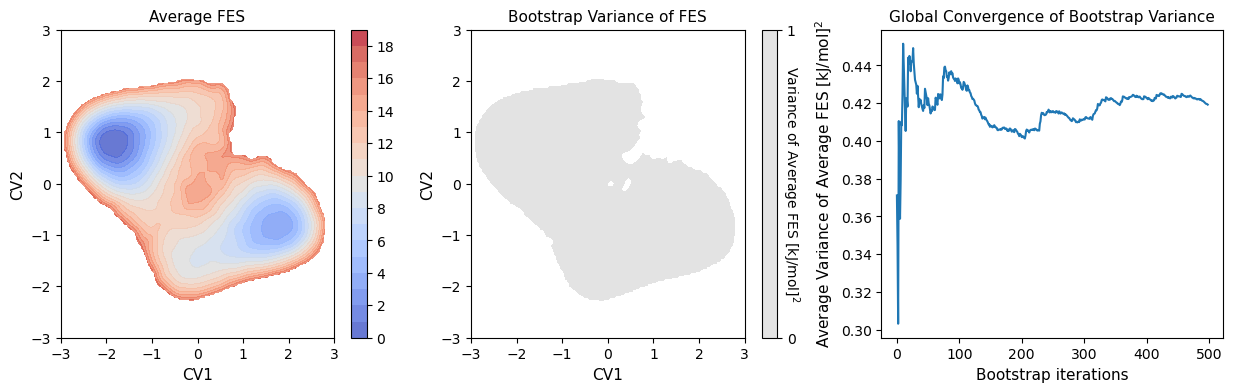

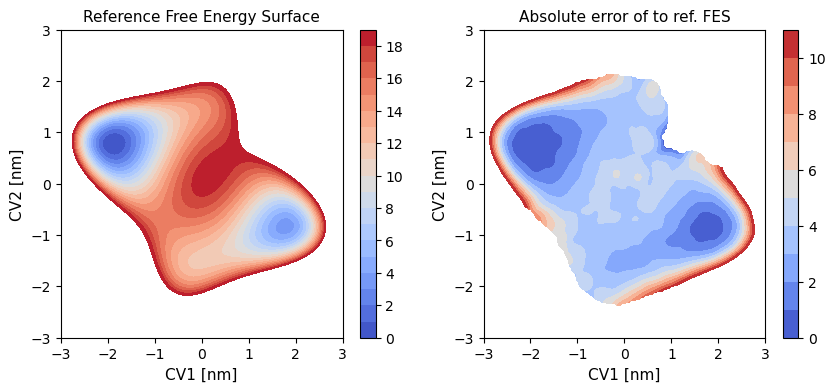

In [21]:
# from pyMFI import MFI

# #Find bootstrap error of 40 simulations

# # [FES_avr, cutoff, var_fes, sd_fes, variance_prog, stdev_prog, var_fes_prog, sd_fes_prog ] = MFI.bootstrap_2D(X, Y, forces_all, 100, FES_cutoff=20, min_grid=np.array((-3, -3)), max_grid=np.array((3, 3)))

import time
start = time.time()
[FES_avr, cutoff, sd_fes, sd_fes_prog ] = MFI.bootstrap_2D_fes(X, Y, forces_all, 500, FES_cutoff=20, min_grid=np.array((-3, -3)), max_grid=np.array((3, 3)))
print("Time for bootstrap", time.time() - start)

MFI.plot_bootstrap(X, Y, MFI.zero_to_nan(np.where(master_patch[-1][0] > 0.1, FES_avr, 0)), MFI.zero_to_nan(np.where(master_patch[-1][0] > 0.1, sd_fes, 0)), sd_fes_prog, FES_lim=20, ofe_lim=2)

plt.figure(33, figsize=(10,4))
plt.subplot(1,2,1)
plt.contourf(X, Y, inve_pot, levels=range(0, 20, 1), cmap='coolwarm')
plt.colorbar()
plt.ylabel('CV2 [nm]', fontsize=11)
plt.xlabel('CV1 [nm]', fontsize=11)
plt.xlim(np.min(X),np.max(X))
plt.ylim(np.min(Y),np.max(Y))
plt.title('Reference Free Energy Surface', fontsize=11)
plt.subplot(1,2,2)
plt.contourf(X, Y, MFI.zero_to_nan(abs(inve_pot - FES_avr)*cutoff_dens), levels=range(0, 12, 1), cmap='coolwarm')
plt.colorbar()
plt.ylabel('CV2 [nm]', fontsize=11)
plt.xlabel('CV1 [nm]', fontsize=11)
plt.xlim(np.min(X),np.max(X))
plt.ylim(np.min(Y),np.max(Y))
plt.title('Absolute error of to ref. FES', fontsize=11)

In [5]:
MFI.save_pkl([X, Y, FES_avr, master_patch[-1][0], sd_fes, sd_fes_prog], results_path + "/invernizzi_multi_sim.pkl")

# [X, Y, FES_avr, Ftot_den, sd_fes, sd_fes_prog] = MFI.load_pkl(results_path + "/invernizzi_multi_sim.pkl")

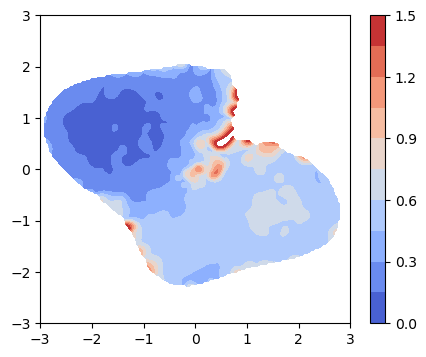

In [22]:
plt.contourf(X,Y,MFI.zero_to_nan(np.where(master_patch[-1][0] > 0.1, sd_fes, 0)), levels=np.linspace(0,1.5,11), cmap="coolwarm")
plt.colorbar()

#### (3) Some short simulations with HP

Simulation:  0    |   Simulation:  1    |   Simulation:  2    |   Simulation:  3    |   Simulation:  4    |   Simulation:  5    |   Simulation:  6    |   Simulation:  7    |   Simulation:  8    |   Simulation:  9    |   

~~~~~~~~~~ HP simulations ~~~~~~~~~~~

Simulation:  0    |   Simulation:  1    |   Simulation:  2    |   

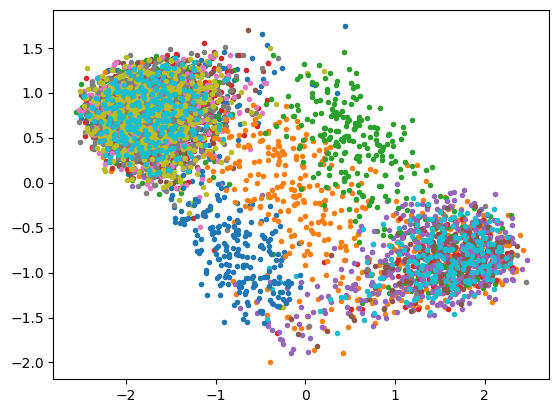

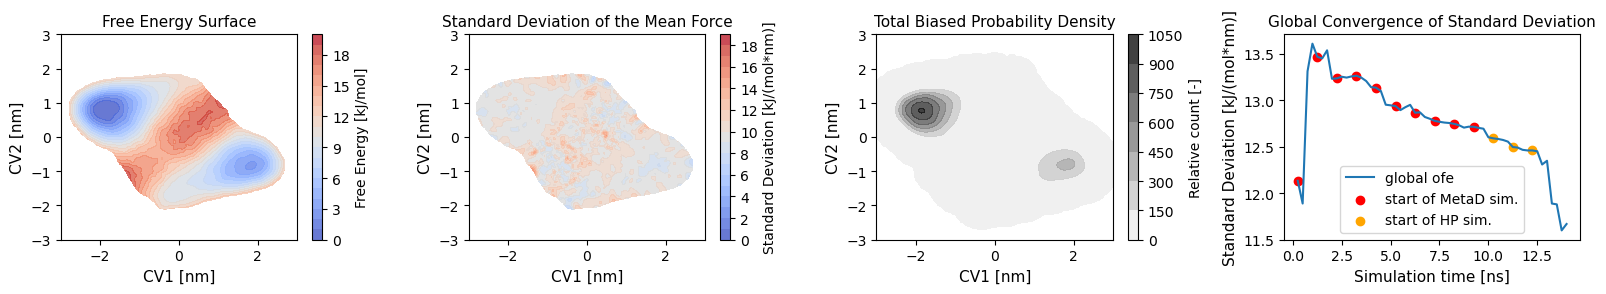



final AD: 2.5951


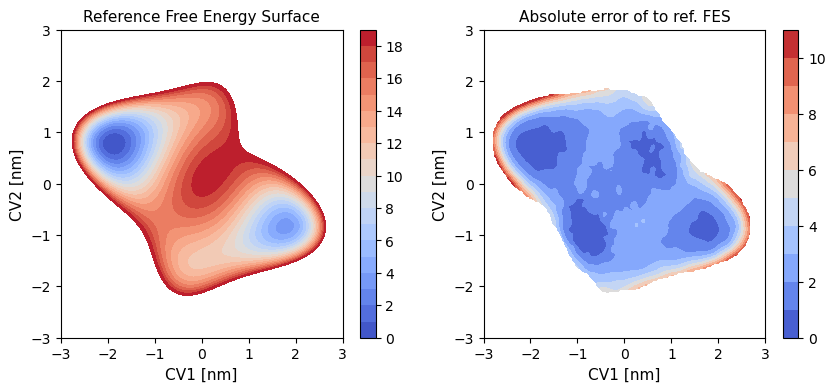

In [4]:
# path_data = "/home/ucecabj/Desktop/pyMFI_git/DATA_examples/Invernizzi_2D_potential"
path_data = "/home/ucecabj/Desktop/pyMFI_git/DATA_examples/Invernizzi_2D_potential_more_data"
os.chdir(path_data)

forces_all = []
master = []
master_patch = [[np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200))]]
ofe_history_patch = [0]
time_history_patch = [0]

n_simulations = 10

for simulation in np.arange(0,n_simulations):   
    print("Simulation: ", simulation, "   |   " , end="")          
    HILLS=MFI.load_HILLS_2D(hills_name="HILLSinve_"+str(simulation))
    plt.plot(HILLS[:,1],HILLS[:,2],'.')
    [X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, ofv_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = MFI.load_pkl(path_data + "/forces_inve_" + str(simulation))
        
    forces_all.append([X, Y, Ftot_den, Ftot_x, Ftot_y])
    master.append([Ftot_den, Ftot_den2, Ftot_x, Ftot_y, ofv_num_x, ofv_num_y])
    master_patch.append(MFI.patch_2D(master))
    ofe_history_patch += ofe_history
    time_history_adj = [element+time_history_patch[-1] for element in time_history]
    time_history_patch += time_history_adj

print("\n\n~~~~~~~~~~ HP simulations ~~~~~~~~~~~\n")

initial_positions = [[-0.8, -0.8],[0,0], [0.5, 0.5]]#, [-0.5, -0.5], [0.25, 0.25], [-1.25, -1.25], [-0.33, -0.33]]  
kappa = 20  
    
    
for simulation in np.arange(0,len(initial_positions)):   
    print("Simulation: ", simulation, "   |   " , end="")          
    if os.path.exists(path_data + "/forces_inve_HP_" + str(simulation)) == True:
        #Read the HILLS file for traj plot
        HILLS=MFI.load_HILLS_2D(hills_name="HILLSinve_HP_"+str(simulation))
        plt.plot(HILLS[:,1],HILLS[:,2],'.')
        [X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, ofv_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = MFI.load_pkl(path_data + "/forces_inve_HP_" + str(simulation))
    else:
        #initial position
        [initial_position_x, initial_position_y] = [initial_positions[simulation][0], initial_positions[simulation][1]]
    
        #Run simulation
        run_plumed.run_2D_Invernizzi(simulation_steps=100000, sigma=0.05, height=0.5, biasfactor=10, initial_position_x=initial_position_x, initial_position_y=initial_position_y,
                   hp_centre_x=initial_position_x, hp_centre_y=initial_position_x, hp_kappa_x=kappa, hp_kappa_y=kappa, file_extension="HP_"+str(simulation))
                                             
        #Read the HILLS and position file
        HILLS=MFI.load_HILLS_2D(hills_name="HILLSinve_HP_"+str(simulation))
        plt.plot(HILLS[:,1],HILLS[:,2],'.')
        [position_x, position_y] = MFI.load_position_2D(position_name="positioninve_HP_"+str(simulation))
        
        [X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, ofv_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, 
                                bw = 0.1, kT = 1, log_pace = 500, error_pace = 100, base_terms = master_patch[-1], nhills=-1, 
                                min_grid=np.array((-3, -3)), max_grid=np.array((3, 3)), nbins=np.array((200, 200)), FES_cutoff = 20, 
		                        hp_centre_x=initial_position_x, hp_centre_y=initial_position_y, hp_kappa_x=kappa, hp_kappa_y=kappa)

        MFI.save_pkl([X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, ofv_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y], path_data + "/forces_inve_HP_" + str(simulation))
        
         
    forces_all.append([X, Y, Ftot_den, Ftot_x, Ftot_y])
    master.append([Ftot_den, Ftot_den2, Ftot_x, Ftot_y, ofv_num_x, ofv_num_y])
    master_patch.append(MFI.patch_2D(master))
    ofe_history_patch += ofe_history
    time_history_adj = [element+time_history_patch[-1] for element in time_history]
    time_history_patch += time_history_adj   
    
    
    
    
[ofv, ofe] = MFI.mean_force_variance(master_patch[-1][0], master_patch[-1][1], master_patch[-1][2], master_patch[-1][3], master_patch[-1][4], master_patch[-1][5])
[X, Y, FES] = MFI.intgrad2(master_patch[-1][2], master_patch[-1][3], min_grid=np.array((-3, -3)), max_grid=np.array((3, 3)))

FES_cutoff = 19
cutoff = np.where(FES <= np.ones_like(FES) * FES_cutoff, 1, 0)

#shorten history to remove the first entry
ofe_history_patch = ofe_history_patch[1:]
time_history_patch = [i for i in time_history_patch[1:]]
sim_start = [time_history_patch[i*int(len(time_history_patch)/(n_simulations+len(initial_positions)))] for i in range(n_simulations+len(initial_positions))]
sim_start_error = [ofe_history_patch[i*int(len(time_history_patch)/(n_simulations+len(initial_positions)))] for i in range(n_simulations+len(initial_positions))]



plt.show()

cutoff_dens = np.where(master_patch[-1][0] >= np.ones_like(FES) * 1, 1, 0)

# Plot Recap
MFI.plot_recap_2D(X, Y, MFI.zero_to_nan(FES*cutoff*cutoff_dens), MFI.zero_to_nan(master_patch[-1][0]), MFI.zero_to_nan(np.sqrt(ofv)*cutoff*cutoff_dens), ofe_history_patch, time_history_patch, FES_lim=21, ofe_map_lim=20)
plt.scatter([time/1000 for time in sim_start[:10]], sim_start_error[:10], c="r", label="start of MetaD sim.")
plt.scatter([time/1000 for time in sim_start[10:]], sim_start_error[10:], c="orange", label="start of HP sim.")
plt.legend()
plt.show()

AD = abs(inve_pot - FES)*cutoff_dens
AAD = np.sum(AD) / np.count_nonzero(cutoff_dens)
print("\n\nfinal AD:", round(AAD, 4))

plt.figure(33, figsize=(10,4))
plt.subplot(1,2,1)
plt.contourf(X, Y, inve_pot, levels=range(0, 20, 1), cmap='coolwarm')
plt.colorbar()
plt.ylabel('CV2 [nm]', fontsize=11)
plt.xlabel('CV1 [nm]', fontsize=11)
plt.xlim(np.min(X),np.max(X))
plt.ylim(np.min(Y),np.max(Y))
plt.title('Reference Free Energy Surface', fontsize=11)
plt.subplot(1,2,2)
plt.contourf(X, Y, MFI.zero_to_nan(AD), levels=range(0, 12, 1), cmap='coolwarm')
plt.colorbar()
plt.ylabel('CV2 [nm]', fontsize=11)
plt.xlabel('CV1 [nm]', fontsize=11)
plt.xlim(np.min(X),np.max(X))
plt.ylim(np.min(Y),np.max(Y))
plt.title('Absolute error of to ref. FES', fontsize=11)

plt.show()
